# 非階層的クラスタリング

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as anim
from sklearn import datasets
from IPython.display import HTML

[ビッグ・ファイブ](https://ja.wikipedia.org/wiki/%E3%83%93%E3%83%83%E3%82%B0%E3%83%95%E3%82%A1%E3%82%A4%E3%83%96_(%E5%BF%83%E7%90%86%E5%AD%A6))理論によると、人間のパーソナリティは、開放性（openness to experience）、勤勉性（conscientiousness）、外向性（extraversion）、協調性（agreeableness）、神経症傾向（neuroticism）の５つ因子の組み合わせで表現できるという。この理論に基づくパーソナリティ診断の質問票が開発されている。

+ [Big Five Personality Test (IPIP Big-Five Factor Markers)](https://openpsychometrics.org/tests/IPIP-BFFM/)  [ [Goldberg, 1992](https://chokkan.github.io/mlnote/reference.html#id16) ]
+ [TIPI日本語版](http://www.f.waseda.jp/oshio.at/research/scales/TIPI-J.pdf) [ [小塩真司 et al., 2012](https://chokkan.github.io/mlnote/reference.html#id20) ]

以下のセルにTIPI-Jによるパーソナリティ診断を実装した（プログラムを読まずに動かしてみるとよい）。

In [2]:
S = """あなた自身にどのくらい当てはまるか、７段階で答えてください。
    1: 全く違うと思う
    2: おおよそ違うと思う
    3: 少し違うと思う
    4: どちらでもない
    5: 少しそう思う
    6: まあまあそう思う
    7: 強くそう思う
"""

A = [
    ["活発で、外向的だと思う", 0],
    ["他人に不満をもち、もめごとを起こしやすいと思う", 0],
    ["しっかりしていて、自分に厳しいと思う", 0],
    ["心配性で、うろたえやすいと思う", 0],
    ["新しいことが好きで、変わった考えをもつと思う", 0],
    ["ひかえめで、おとなしいと思う", 0],
    ["人に気をつかう、やさしい人間だと思う", 0],
    ["だらしなく、うっかりしていると思う", 0],
    ["冷静で、気分が安定していると思う", 0],
    ["発想力に欠けた、平凡な人間だと思う", 0],
]

def tipij(A):
    v = [a[1] for a in A]
    return {
        '外向性': (v[0] + (8 - v[5])) / 2,
        '協調性': ((8 - v[1]) + v[6]) / 2,
        '勤勉性': (v[2] + (8 - v[7])) / 2,
        '神経症傾向': (v[3] + (8 - v[8])) / 2,
        '開放性': (v[4] + (8 - v[9])) / 2
    }

print(S, end='')
for a in A:
    a[1] = int(input(a[0]))
tipij(A)

あなた自身にどのくらい当てはまるか、７段階で答えてください。
    1: 全く違うと思う
    2: おおよそ違うと思う
    3: 少し違うと思う
    4: どちらでもない
    5: 少しそう思う
    6: まあまあそう思う
    7: 強くそう思う


活発で、外向的だと思う 4
他人に不満をもち、もめごとを起こしやすいと思う 4
しっかりしていて、自分に厳しいと思う 4
心配性で、うろたえやすいと思う 4
新しいことが好きで、変わった考えをもつと思う 4
ひかえめで、おとなしいと思う 4
人に気をつかう、やさしい人間だと思う 4
だらしなく、うっかりしていると思う 4
冷静で、気分が安定していると思う 4
発想力に欠けた、平凡な人間だと思う 4


{'外向性': 4.0, '協調性': 4.0, '勤勉性': 4.0, '神経症傾向': 4.0, '開放性': 4.0}

さて、このビッグ・ファイブの５つの因子はどのように「発見」されたのだろうか？　人間の設計図は遺伝子にあり、人間の行動を掌るのが脳であるならば、人間の脳や遺伝子を調べて、パーソナリティの形成に影響を与える要因を発見すればよいと思うかもしれない。ただ、このアプローチは難しすぎる。ビッグ・ファイブのパーソナリティ因子は遺伝的影響を受けているとの報告もあるが  [ [Lo et al., 2017](https://chokkan.github.io/mlnote/reference.html#id17) ]、これはビッグ・ファイブの因子を既知のものとして、遺伝子と対応付けた研究であり、パーソナリティの因子を遺伝子から特定した訳ではない。

ビッグ・ファイブの理論の因子は[語彙仮説](https://en.wikipedia.org/wiki/Lexical_hypothesis)（lexical hypothesis）に基づいて求められている。Goldberg [ [1982](https://chokkan.github.io/mlnote/reference.html#id15) ]  では、その仮説を以下の文で説明している。

> 人と人との日常的なやり取りにおける最も重要な個人差は、最終的に人々の言語で記号化されることになる。 (Those individual differences that are the most significant in the daily transactions of persons with each other will eventually become encoded into their language.)

つまり、人間が使う言葉を分析することで、パーソナリティの因子を見つけることができると考えたのである。Allport and Odbert [ [1936](https://chokkan.github.io/mlnote/reference.html#id13) ]  は、[Webster's Dictionary](https://en.wikipedia.org/wiki/Webster%27s_Dictionary)の第2版に収録されている単語から、人間を形容しうる17,953語を抜き出し、以下の4つの単語リストをまとめた。

+ List I: 人間のパーソナリティを明確に表現する4,504語
    + *agressive*, *introverted*, *sociable*など
+ List II: 人間の活動や心の一時的な状態を表現する4,541語
    + *abashed*, *gibbering*, *rejoicing*, *frantic*など
+ List III: 人間の性格の評価や社会的な役割・関係を表現する5,226語
    + *insignificant*, *acceptable*, *worthy*, *dazzling*, *irritating*など
+ List IV: 人間のパーソナリティを表現するかもしれない3,682語
    + *pampered*, *crazed*, *malformed*, *roly-poly*, *lean*, *red-headed*, *hoarse*など

この4つの単語リストを作るだけでも大変であるが、コンピュータが誕生していない1936年頃に、作成した単語リストを分析することは困難であったに違いない。Allport and Odbert [ [1936](https://chokkan.github.io/mlnote/reference.html#id13) ]  は作成した単語のリストに134ページを割いて論文にまとめ、後続の研究に分析を託した。

Cattell [ [1943](https://chokkan.github.io/mlnote/reference.html#id14) ] は Allport and Odbert [ [1936](https://chokkan.github.io/mlnote/reference.html#id13) ]  のList Iに収録されている単語を分析することにより、パーソナリティの因子を導出しようと試みた。CattellはList Iの単語（＋独自に追加した約100単語）から、意味の似ている単語や対義語をまとめ、パーソナリティを表す単語をグループ化することで、パーソナリティの因子を15個から20個くらいに絞り込んだと言われている。その後、様々な研究者が単語リストからパーソナリティの因子を見出すため、クラスタ分析（cluster analysis）や因子分析（factor analysis）を適用した。Norman [ [1963](https://chokkan.github.io/mlnote/reference.html#id19) ]  の分析により、現在のビッグ・ファイブの原型となるものが形作られたと言われている。

ここで伝えたかったことは、人間のパーソナリティの因子は「こうあるべき」とか「こうであるに違いない」という仮定を置かずに、辞書や被験者を用いた実験から得られたデータを分析し、冗長なものを削ぎ落としていくことでパーソナリティの５つの因子にたどり着いたことである。このように、出力すべきラベルやスコアを与えず、データの各事例を説明する特徴的なパターンを発見することを、**教師なし学習**（unsupervised learning）と呼ぶ。

## クラスタ分析

前置きが長くなったが、今回のテーマは、データ中で類似する特徴を持つ事例をまとめてグループ化する**クラスタ分析**（cluster analysis）もしくは**クラスタリング**（clustering）と呼ばれる処理である。分類と似ているが、クラスタリングではカテゴリ、すなわちグループはこうあるべき、という情報が事前に与えられない。一方、分類モデルの学習では、各事例をどのカテゴリに分類すべきかを表す教師データが与えられていた。クラスタ分析では各事例をどのように分類すべきかを表すデータが与えられないので、教師なし学習の一種である。

クラスタ分析には以下のような応用例がある。グループ化することで全体を把握しやすくなることから、データの要約や圧縮の目的で使われることも多い。

+ ショッピングサイトの購買履歴から顧客をグループ分けする
+ ウェブサイトの閲覧履歴や検索履歴に基づいて、ユーザをグループ分けする
+ Twitterのリツイート履歴に基づいて、ユーザをグループ分けする
+ レビューから、製品に対する意見をグループ分けする
+ 心理学のアンケート調査から人間を類型化する
+ 遺伝子の発現データから似ている遺伝子群を見つける、もしくは似ている個体群を見つける

なお、[Oxford Learner's Dictionary](https://www.oxfordlearnersdictionaries.com/)によると、[クラスタ（cluster）](https://www.oxfordlearnersdictionaries.com/definition/english/cluster_1)の意味は「一緒に成長したり近くに出現し、同じ種類のモノのグループ」（a group of things of the same type that grow or appear close together）であり、日本語の「群れ」や「房」に近い意味である。星団（star cluster）、きのこの群生（cluster of mushrooms）などの用法の他、分散並列処理に用いるコンピュータ群もクラスタと呼ばれる。

<a title="SALT, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:47tuc_salt.jpg"><img width="256" alt="47tuc salt" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/47tuc_salt.jpg/512px-47tuc_salt.jpg"></a>
<a title="Pseudopanax at en.wikipedia, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Cluster_of_mushrooms.jpg"><img width="256" alt="Cluster of mushrooms" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5f/Cluster_of_mushrooms.jpg/512px-Cluster_of_mushrooms.jpg"></a>

## K-meansクラスタリング

$d$次元のベクトル$\pmb{x} \in \mathbb{R}^d$で表された事例を$N$件集めたデータがある。

<a id="f10-1"></a>
(10.1)  
\begin{align}
\mathcal{D} = \{\pmb{x}_1, \pmb{x}_2, \dots, \pmb{x}_N\} = \{\pmb{x}_i\}_{i=1}^N
\end{align}

このデータ中の事例を$K$個のクラスタに分割したい。なお、実際にクラスタリングを行うときは、クラスタの数$K$をどのように決定するかが重要な問題となるが、当面は$K$を事前に決定してあるものとする。

ここで、$1$から$N$までの自然数の集合を$\mathbb{N}_N$と書くことにする。各クラスタに所属する事例を集合$C_1, C_2, \dots, C_K$で表す。$k$番目のクラスタを表す集合$C_k$は、そのクラスタに属する事例のインデックス番号を集めたものであると定義する。

<a id="f10-2"></a>
(10.2)  
\begin{align}
C_k = \{i \in \mathbb{N}_N \mid \text{事例$\pmb{x}_i$が$k$番目のクラスタに属する}\}
\end{align}

各事例は$C_1$から$C_K$までのいずれかのクラスタに必ず属することとする。すなわち、任意の異なる$k, k' \in \mathbb{N}_K$に対して、$C_k \cap C_{k'} = \emptyset$ (複数クラスタで重複なし)を満たし、かつ$\bigcup\limits_{k = 1}^K C_k = \mathbb{N}_N$ (クラスタの和集合=自然数の集合) である。あるいは、集合族$\{C_1, C_2, \dots, C_K\}$は$\mathbb{N}_N$の分割と説明することもできる。

例えば、事例数が$4$（$N=4$）のデータを$2$個のクラスタ（$K=2$）に分割するとき、$\pmb{x}_1, \pmb{x}_2, \pmb{x}_4$が$1$番目のクラスタに属し、$\pmb{x}_3$が$2$番目のクラスタに属する状況を、

<a id="f10-3"></a>
(10.3)  
\begin{align}
C_1 = \{1, 2, 4\}, C_2 = \{3\}
\end{align}

として表す。

さて、クラスタリングの基本的な考え方は、同じクラスタ内に属する事例間の距離が近く、異なるクラスタ間に属する事例間の距離が遠くなるように、クラスタの割り当てを決定することである。あるクラスタ割り当てが与えられたとき、**K-meansクラスタリング**（K平均クラスタリング）では、各クラスタ$C_k$を中心ベクトル$\pmb{\mu}_k$で代表させる。

<a id="f10-4"></a>
(10.4)  
\begin{align}
\pmb{\mu}_k = \frac{1}{|C_k|} \sum_{i \in C_k} \pmb{x}_i
\end{align}

例えば、以下の8個の点が同じクラスタに属する場合、そのクラスタを中心ベクトル（×印）で代表させる。

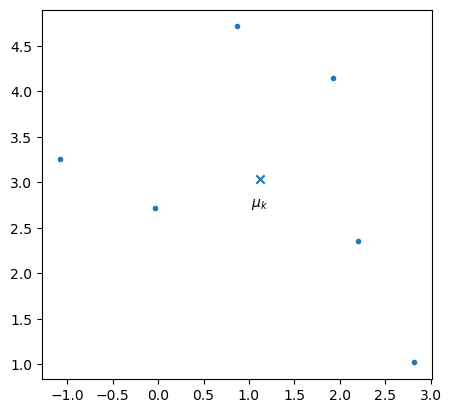

In [3]:
X, y = datasets.make_blobs(n_samples=6, random_state=0)
mu = X.mean(axis=0)

fig, ax = plt.subplots(dpi=100)
ax.scatter(X[:,0], X[:,1], marker='.', color='tab:blue')
ax.scatter([mu[0]], [mu[1]], marker='x', color='tab:blue')
ax.text(mu[0], mu[1]-0.3, '$\mu_k$', ha='center')
ax.set_aspect('equal')
plt.show()

そして、クラスタ$C_k$のまとまり具合を計測する尺度として、そのクラスタに属する事例ベクトルと中心ベクトルとの二乗距離の和を用いる。

<a id="f10-5"></a>
(10.5)  
\begin{align}
\sum_{i \in C_k} \|\pmb{x}_i - \pmb{\mu}_k\|^2
\end{align}


$||$ ： ノルム = 距離  


これは、クラスタ$C_k$に属する事例の分散の$|C_k|$倍であるから、クラスタ$C_k$内のデータのばらつきを表していると解釈できる。先ほどの例を用いると、各事例（点）と中心ベクトル（×印）とのユークリッド距離（下図点線）の二乗和である。

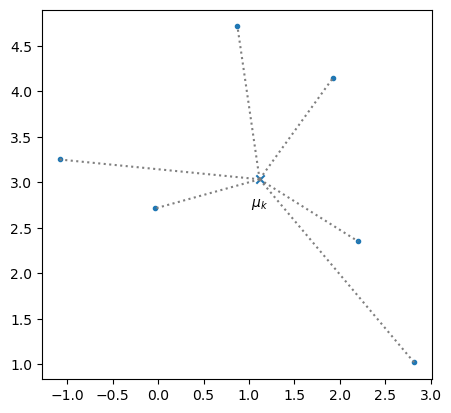

In [4]:
fig, ax = plt.subplots(dpi=100)
ax.scatter(X[:,0], X[:,1], marker='.', color='tab:blue')
ax.scatter([mu[0]], [mu[1]], marker='x', color='tab:blue')
ax.text(mu[0], mu[1]-0.3, '$\mu_k$', ha='center')
for i in range(len(X)):
    ax.plot([mu[0], X[i][0]], [mu[1], X[i][1]], ls=':', color='tab:gray')
ax.set_aspect('equal')
plt.show()

K-meansクラスタリングでは、クラスタ内の事例と中心ベクトルの二乗距離の
クラスタ内の二乗距離を全てのクラスタに対して求め、その和を取ったものは、歪み尺度（distortion measure）、クラスタ内平方和（WCSS: within-cluster sum-of-squares）、慣性（inertia）などと呼ばれる。K-meansクラスタリングは、この目的関数$J$を最小化するようなクラスタ割り当て$C_1, C_2, \dots, C_K$を求める問題である。


---

### 【ポイント】K-meansクラスタリングの目的関数

<a id="f10-6"></a>
(10.6)  
$$
\begin{align}
J = \sum_{k=1}^{K} \sum_{i \in C_k} \|\pmb{x}_i - \pmb{\mu}_k\|^2
\end{align}
$$


---

## Lloydのアルゴリズム

この目的関数を最小化するクラスタ割り当てを求める問題はNP困難であることが知られている [ [Mahajan et al., 2012](https://chokkan.github.io/mlnote/reference.html#id12) ]。ところが、クラスタ割り当てを求める近似解法として、Lloydのアルゴリズム  [ [Lloyd, 1982](https://chokkan.github.io/mlnote/reference.html#id10) ] が用いられてきた。


---

### 【ポイント】Lloydのアルゴリズム

1: すべてのクラスタの中心$\pmb{\mu}_k$を適当に初期化する（例えばデータからランダムに点を$K$個選んでもよい）。

2: すべての事例$\pmb{x}_i$に関して、最も近いクラスタ中心を求め、クラスタを$C_1, \dots, C_K$を作成する。具体的には、事例$\pmb{x}_i$を以下の式で求まるクラスタ番号$k^*$に所属させる。

<a id="f10-7"></a>
(10.7)  
$$
\begin{align}
k^* = \mathop{\rm argmin}\limits_{k \in \{1, \dots, K\}} \|\pmb{x}_i - \pmb{\mu}_k\|^2
\end{align}
$$

3: すべてのクラスタの中心$\pmb{\mu}_k$を計算する。クラスタ$C_k$の中心は次式で計算する。

<a id="f10-8"></a>
(10.8)  
$$
\begin{align}
\pmb{\mu}_k = \frac{1}{|C_k|} \sum_{i \in C_k} \pmb{x}_i
\end{align}
$$

4: クラスタの割り当てが変化しなくなるまで手順2と3を繰り返す


---

以下のデータ（$d=2, N = 15$）を例としてK-meansアルゴリズムの動作を説明する。

In [5]:
X, y = datasets.make_blobs(n_samples=12, random_state=0)
X = np.fliplr(X) # Flipping x0 and x1 makes the visualization beautiful.

このデータを$xy$平面上にプロットする。

In [6]:
def initialize_plot(ax, X, has_message=True):
    d = 1.5 if has_message else 1.
    ax.set_xlim(X[:,0].min()-1, X[:,0].max()+1)
    ax.set_ylim(X[:,1].min()-d, X[:,1].max()+1)
    ax.set_aspect('equal')

def draw_kmeans(ax, X, y=None, centers=None, wcss=None, msg='', arrowstyle='-'):
    
    def get_annotation_position(p, center, dist=0.5):
        delta = p - center
        delta /= np.linalg.norm(delta)
        return p + delta * dist
        
    artist = []
    center = X.mean()
    
    # Draw data points.
    colors = y if y is not None else 'black'
    artist.append(ax.scatter(X[:,0], X[:,1], c=colors, marker='.'))

    # Draw cluster centers.
    if centers is not None:
        artist.append(ax.scatter(centers[:,0], centers[:,1], marker='x', c=range(len(centers))))

    # Draw cluster IDs.
    if centers is not None:
        for i, mu in enumerate(centers):
            p = get_annotation_position(mu, center)
            artist.append(ax.text(p[0], p[1], f'{i+1}', ha='center', va='center'))

    # Draw dotted lines between cluster centers and members.
    if centers is not None and y is not None:
        for i, x in enumerate(X):
            cid = y[i]
            artist.append(
                ax.annotate(
                    '', xy=x, xytext=centers[cid],
                    arrowprops=dict(
                        arrowstyle=arrowstyle, 
                        linestyle="--",
                        shrinkA=0,
                        shrinkB=0,
                        color='tab:gray'
                    )
                )
            )

    # Draw the message.
    if msg:
        xmin, xmax = ax.get_xlim()
        ymin, ymax = ax.get_ylim()
        artist.append(ax.text(xmin+0.2, ymin+0.2, msg))

    return artist

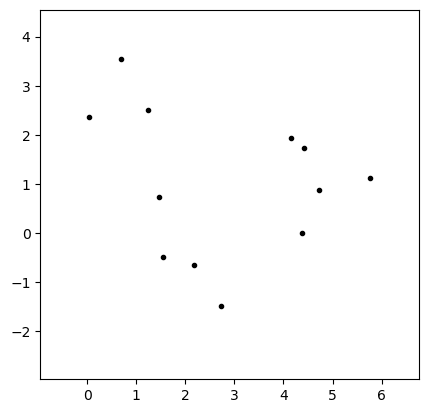

In [7]:
fig, ax = plt.subplots(dpi=100)
initialize_plot(ax, X)
draw_kmeans(ax, X)
plt.show()

Lloydのアルゴリズムの実装例を以下に示す。

In [8]:
def kmeans(X, num_clusters, max_iterations=1000, seed=0, H=None):
    n, d = X.shape
    wcss = 0.
    y = np.zeros(n, dtype=int)
    y_old = None
    
    # Prepare a random generator with the seed.
    rng = np.random.default_rng(seed)
    
    # Extract K points at random from the data as the initial centers.
    centers = X[rng.permutation(n)[:num_clusters]]
    
    for t in range(max_iterations):
        wcss = 0.

        # Record the cluster centers (used only for visualizing the progress).
        if H is not None:
            H.append([t, 'center', centers.copy()])

        # Find cluster assignments.
        for i in range(n):
            # Compute the distance to each cluster center.
            dist = ((X[i] - centers) ** 2).sum(1)
            # Assign the id of the closest cluster.
            y[i] = np.argmin(dist)
            wcss += dist[y[i]]
        
        # Record the cluster assignments and WCSS (used only for visualizing the progress).
        if H is not None:
            H.append([t, 'assign', wcss, y.copy()])
        
        # Terminate if the cluster assignement was unchanged.
        if np.all(y == y_old):
            break
        
        # Compute the geometric center of each cluster.
        for c in range(num_clusters):
            indices = np.where(y == c)       # i such that Y[i] == c
            centers[c] = X[indices].mean(0)
        
        # Store the current cluster assignment for the next iteration.
        y_old = y.copy()

    return y, centers, wcss

K-meansクラスタリングの実行結果を可視化する。クラスタを色分けして表示し、さらに各クラスタの中心を×印で示した。WCSSはクラスタ内平方和、すなわち目的関数の値である。

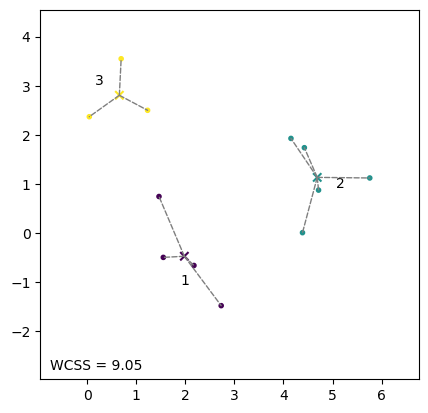

In [9]:
num_clusters = 3
seed = 8
y_pred, centers, wcss = kmeans(X, num_clusters, seed=seed)

fig, ax = plt.subplots(dpi=100)
initialize_plot(ax, X)
draw_kmeans(ax, X, y_pred, centers, msg=f'WCSS = {wcss:.2f}')
plt.show()

Lloydのアルゴリズムの動作を理解しやすくするため、クラスタの中心や割り当てが更新されていく様子をアニメーションで表示した。

In [10]:
H = []
seed = 8
final_y, final_centers, final_wcss = kmeans(X, num_clusters, seed=seed, H=H)

fig, ax = plt.subplots(dpi=100)
initialize_plot(ax, X)

artists = []
y = None
centers = None

artists.append(draw_kmeans(ax, X, y, centers, msg='Data points to be clustered'))

for h in H:
    t, event, args = h[0], h[1], h[2:]
    if event == 'center':
        centers = args[0]
        if t == 0:
            msg = f'Iter {t+1}: initialize centers at random'
        else:
            msg = f'Iter {t+1}: update centers from members'            
        artists.append(draw_kmeans(ax, X, y, centers, arrowstyle='<-', msg=msg))
    elif event == 'assign':
        wcss, y = args
        msg = f'Iter {t+1}: update members (WCSS={wcss:.2f})'            
        artists.append(draw_kmeans(ax, X, y, centers, arrowstyle='->', msg=msg))

msg = f'Final result (WCSS={final_wcss:.2f})'            
artists.append(draw_kmeans(ax, X, final_y, final_centers, arrowstyle='-', msg=msg))

ani = anim.ArtistAnimation(fig, artists, interval=2000)
html = ani.to_jshtml()
plt.close(fig)
HTML(html)

Lloydのアルゴリズムの実行結果は最初に選んだクラスタの中心によって変わることがある。最初にクラスタの中心として用いる$K$個のデータ点の選び方を変更するため、乱数のシード値を変更する（$8 \to 0$）。なお、乱数のシード値は乱数の出現順序を決める数列を指定するものであるため、シード値そのものを意味づけすることはできない。

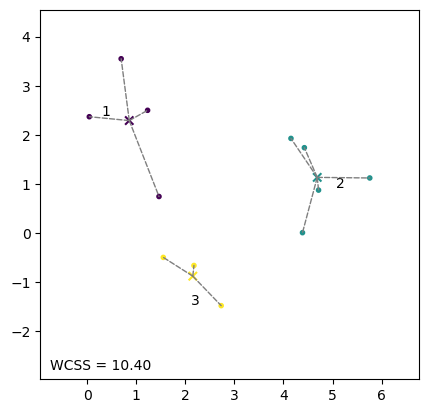

In [11]:
seed = 0
y_pred, centers, wcss = kmeans(X, num_clusters, seed=seed)

fig, ax = plt.subplots(dpi=100)
initialize_plot(ax, X)
draw_kmeans(ax, X, y_pred, centers, msg=f'WCSS = {wcss:.2f}')
plt.show()

すると、先ほどとは全く異なるクラスタリングの結果が得られた。また、目的関数の値も$9.05$から$10.40$に上昇したことから、クラスタリング結果が悪化したと言える。これは、Lloydアルゴリズムはクラスタ中心の初期値によっては局所解に陥ることを示している。

最初のクラスタ中心の選び方でLloydアルゴリズムの実行結果がどの程度影響を受けるのかを調べるため、乱数のシードを$0$から$19$まで変化させて、クラスタリング結果を可視化する。以下のグラフを見ると、クラスタリングの実行結果は最初のシードの選び方の影響を大きく受けていることが分かる。

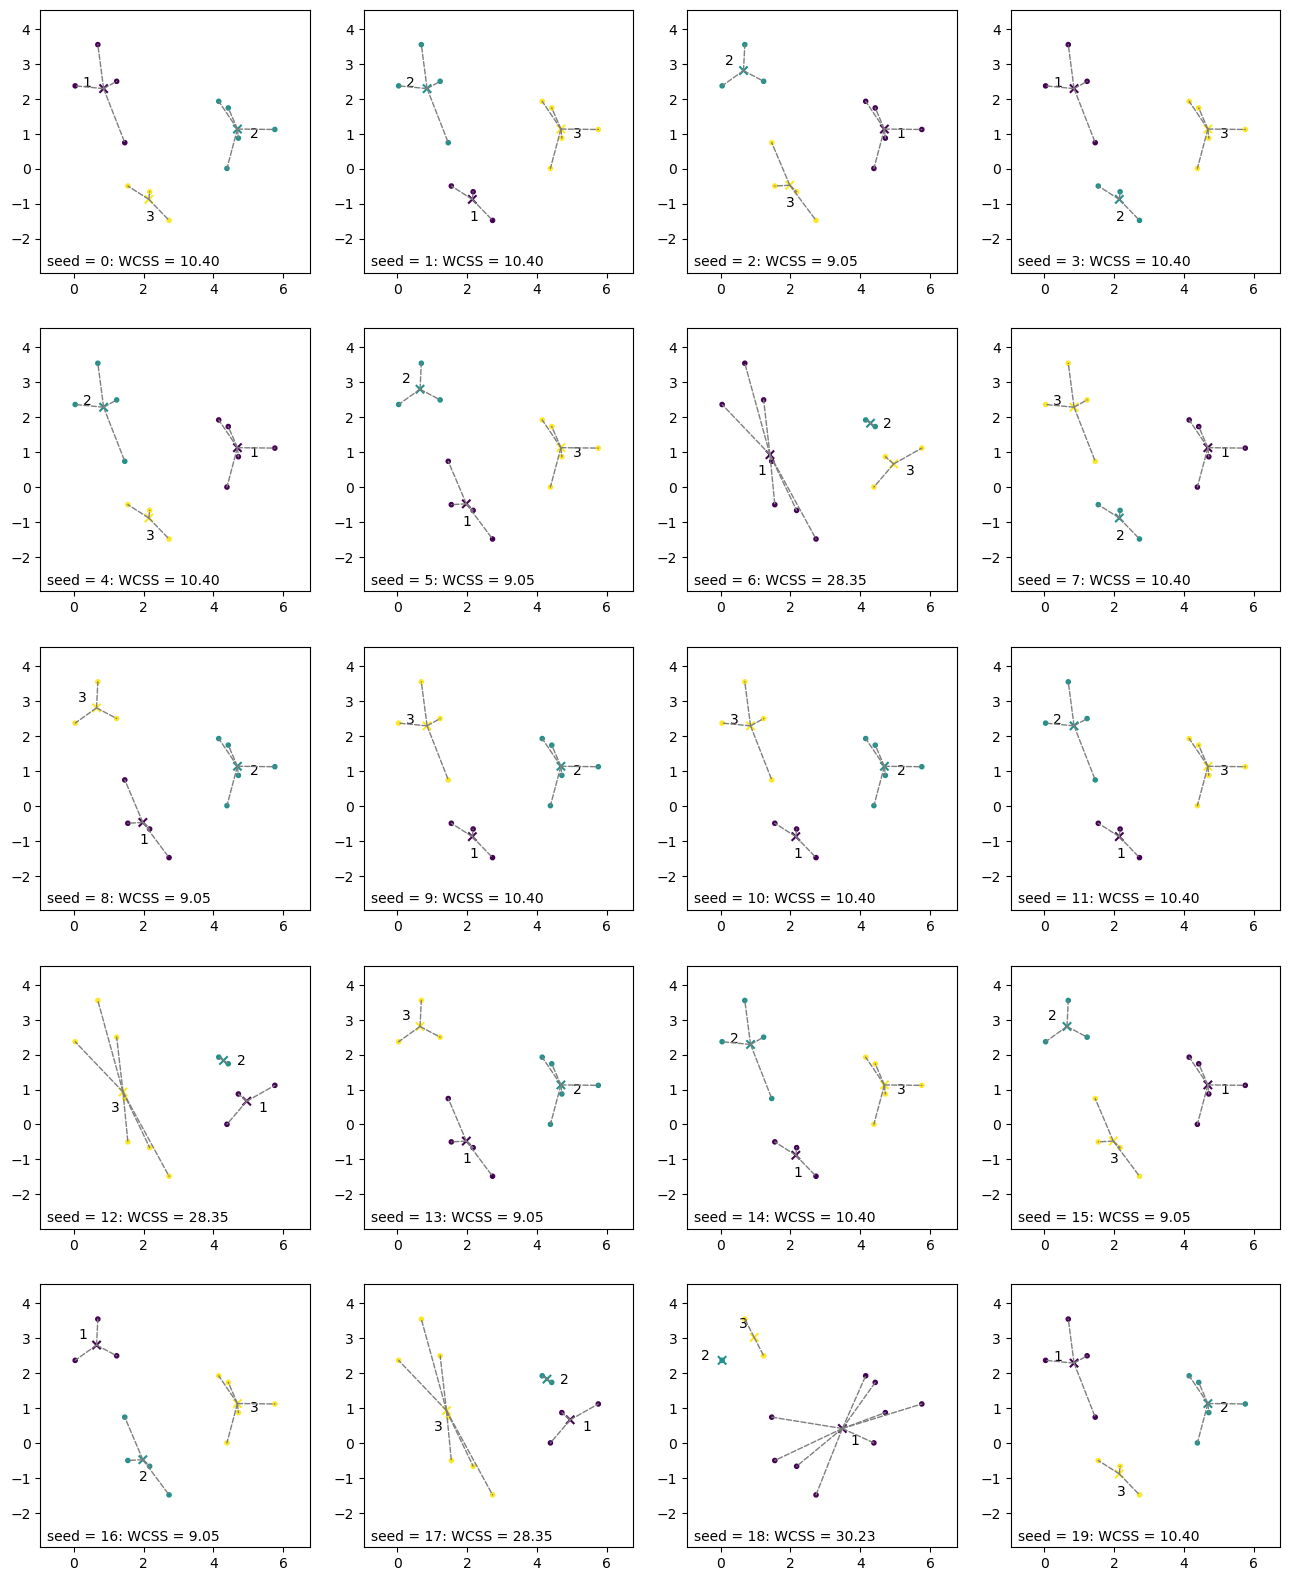

In [12]:
fig, axs = plt.subplots(5, 4, dpi=100, figsize=(16, 20))

for i in range(20):
    ax = axs[i // 4][i % 4]
    initialize_plot(ax, X)
    y_pred, centers, wcss = kmeans(X, num_clusters, seed=i)
    draw_kmeans(ax, X, y_pred, centers, msg=f'seed = {i}: WCSS = {wcss:.2f}')
plt.show()

そこで、LloydのアルゴリズムでK-meansクラスタリングを行うときは、冒頭で用いるクラスタの中心の初期値を変えながらアルゴリズムを実行し、目的関数の値が最も下がったクラスタリング結果を採用する、といった工夫が用いられる（後述する[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)にも実装されている）。

## K-meansの目的関数の最小化

Lloydのアルゴリズムがジャーナル論文として出版されたのは1982年であるが、Lloydのアルゴリズムそのものは1950年代後半から知られるようになっていた。K-meansという名前が使われるようになったのは、MacQueen [ [1967](https://chokkan.github.io/mlnote/reference.html#id11) ] の論文によると言われている。そこで、K-meansの目的関数$J$とLloydのアルゴリズムがそのように関係するのか説明しておく。

クラスタの割り当てを決める際、学習データ$\mathcal{D} = \{\pmb{x}_i\}_{i=1}^N$は不変であるので、K-meansクラスタリングの目的関数（式[(10.6)](#f10-6)）は$C_1, \dots, C_K, \pmb{\mu}_1, \dots, \pmb{\mu}_K$の関数である。

<a id="f10-9"></a>
(10.9)  
\begin{align}
J = \sum_{k=1}^{K} \sum_{i \in C_k} \|\pmb{x}_i - \pmb{\mu}_k\|^2
\end{align}

この目的関数を最小化するため、$C_1, \dots, C_K$と$\pmb{\mu}_1, \dots, \pmb{\mu}_K$を交互に更新していくことを考える。

まず、$\pmb{\mu}_1, \dots, \pmb{\mu}_K$を固定して、目的関数$J$を最小化するクラスタ割り当て$C_1, \dots, C_K$を求めることを考える。全ての事例はいずれかのクラスタに属しなければならないが、$\pmb{\mu}_1, \dots, \pmb{\mu}_K$が固定されている状況では、ある事例のクラスタ割り当てが別の事例のクラスタ割り当てに影響を及ぼしたり、目的関数$J$の値を変化させてしまうことはない。したがって、事例$\pmb{x}_i$ごとに距離が最小となる中心$\pmb{\mu}_k$を選べばよい。すなわち、事例$\pmb{x}_i$を次式で求まる番号のクラスタに所属させればよい。

<a id="f10-10"></a>
(10.10)  
\begin{align}
\mathop{\rm argmin}\limits_{k \in \{1, \dots, K\}} \|\pmb{x}_i - \pmb{\mu}_k\|^2
\end{align}

これにより、Lloydのアルゴリズムの式[(10.7)](#f10-7)を導出できた。

次に、クラスタ割り当て$C_1, \dots, C_K$を固定して、目的関数$J$を最小にする$\pmb{\mu}_1, \dots, \pmb{\mu}_K$を求める。目的関数$J$の計算において、各$\pmb{\mu}_k$の間に依存関係はないので、全ての$k \in \mathbb{N}_K$に対して、目的関数を最小とする$\pmb{\mu}_k$を求めればよい。そこで、目的関数$J$を$\pmb{\mu}_k$で偏微分して$0$とおく。

<a id="f10-11"></a>
(10.11)  
\begin{align}
\frac{\partial J}{\partial \pmb{\mu}_k} = \frac{\partial}{\partial \pmb{\mu}_k} \left(\sum_{i \in C_k} \|\pmb{x}_i - \pmb{\mu}_k\|^2\right) = 2 \sum_{i \in C_k} (\pmb{x}_i - \pmb{\mu}_k) &= 0 \\
\sum_{i \in C_k} \pmb{x}_i - \sum_{i \in C_k} \pmb{\mu}_k &= 0 \\
\sum_{i \in C_k} \pmb{x}_i - |C_k| \pmb{\mu}_k &= 0 \\
\pmb{\mu}_k &= \frac{1}{|C_k|} \sum_{i \in C_k} \pmb{x}_i
\end{align}

これは、Lloydのアルゴリズムの式[(10.8)](#f10-8)に一致する。

以上により、K-meansの目的関数$J$を最小化することで、Lloydのアルゴリズムを導出できたことになる。この最小化の手順はExpectation Maximization (EM) アルゴリズムとの対応があるが、ここではその詳細を説明しない。

## scikit-learnによる実装

K-meansクラスタリングは[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)クラスを使うと簡単に実行できる。局所解の問題に対処するため、デフォルトではクラスタ中心の初期値を変えながら10回試行し（`n_init=10`）、その中で目的関数の値が最も下がったクラスタリング結果を返してくれる。

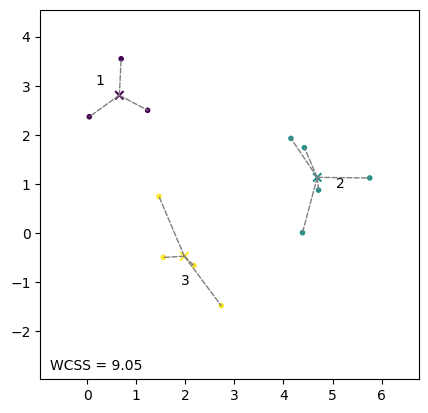

In [13]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)
y_pred = model.labels_

fig, ax = plt.subplots(dpi=100)
initialize_plot(ax, X)
draw_kmeans(ax, X, y_pred, model.cluster_centers_, msg=f'WCSS = {model.inertia_:.2f}')
plt.show()

## クラスタ数の選び方

クラスタ分析においてよく湧き上がる疑問は、クラスタ数$K$の選び方である。これには明確な指針がある訳ではない。また、「データの事例を３つのグループに分けたい」といった強い動機がある場合は、クラスタ数$K$をその値にセットすればよい。もし、データの傾向を見ながらクラスタ数を決定したいと考えている場合は、クラスタ数$K$を変えながらクラスタリング結果を確認する。

以下の例では、クラスタ数を$K=1$から$K=8$まで変化させながら、クラスタリング結果を可視化したものである。

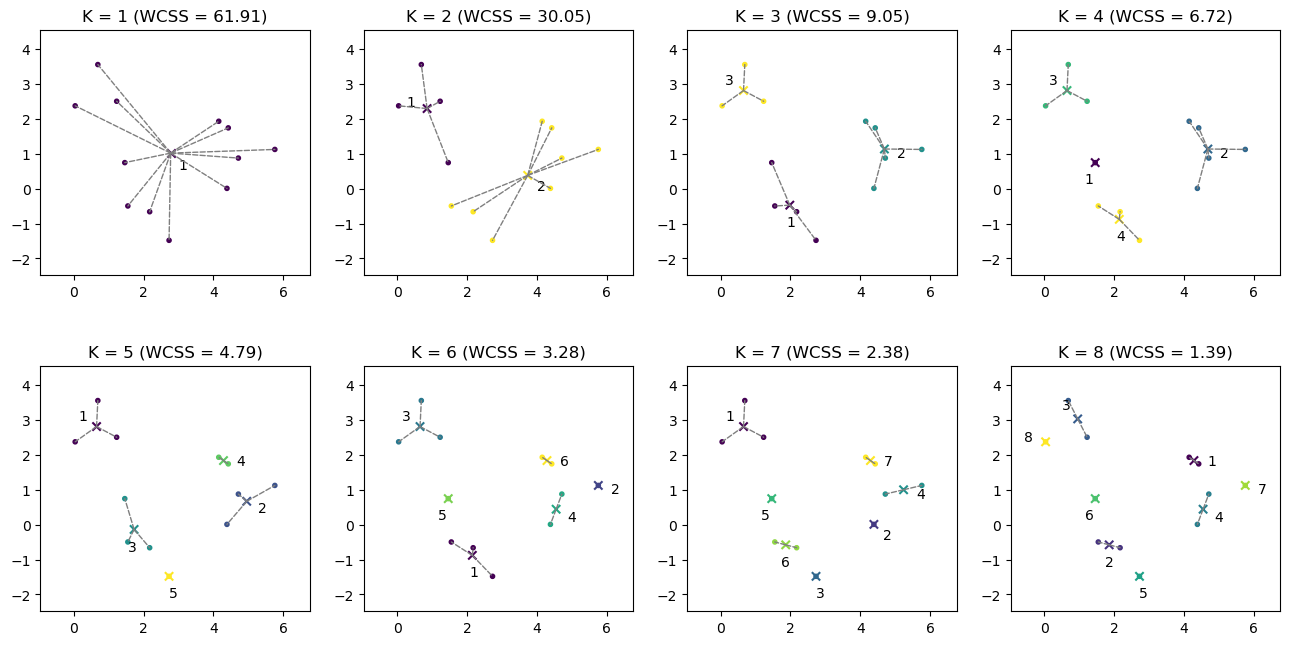

In [14]:
fig, axs = plt.subplots(2, 4, dpi=100, figsize=(16, 8))

J = []
for n in range(0, 8):
    num_clusters = n+1
    
    model = KMeans(n_clusters=num_clusters)
    model.fit(X)
    y_pred = model.labels_
    J.append(model.inertia_)

    ax = axs[n // 4][n % 4]
    initialize_plot(ax, X, has_message=False)
    ax.set_title(f'K = {num_clusters} (WCSS = {model.inertia_:.2f})')
    draw_kmeans(ax, X, y_pred, model.cluster_centers_)

plt.show()

また、$K$の値を横軸に、目的関数（WCSS）の値を縦軸にプロットすると以下のようになる。

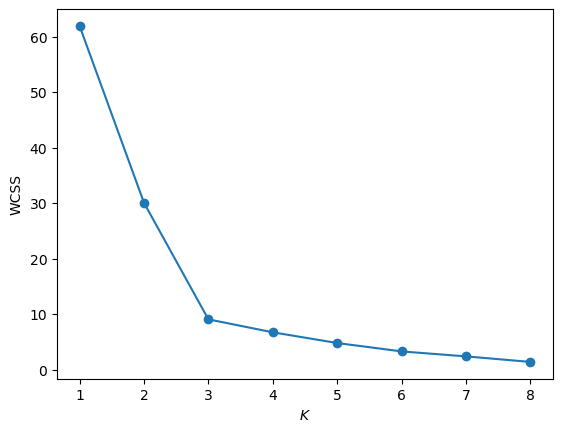

In [15]:
fig, ax = plt.subplots(dpi=100)
ax.plot(list(range(1, 9)), J, 'o-')
ax.set_xlabel('$K$')
ax.set_ylabel('WCSS')
plt.show()

K-meansクラスタリングのクラスタ数$K$を決定する一つの基準として、目的関数の下がり方が鈍化したときの$K$を採用する、という考え方がある。以上のグラフからは、$K=3$あたりから目的関数の下がり方が緩やかになっているので、$K=3$と決定するのが妥当かもしれない。

## ボロノイ図

K-meansでクラスタ中心$\pmb{\mu}_1, \dots, \pmb{\mu}_K \in \mathbb{R}^d$を求めたとする。このとき、特徴空間$\mathbb{R}^d$上で他のクラスタ中心よりも$\pmb{\mu}_k$の方が近くなる領域$V(\pmb{\mu}_k)$、
\begin{align*}
V(\pmb{\mu}_k) = \{\pmb{x} \in \mathbb{R}^d \mid \|\pmb{x} - \pmb{\mu}_k\|^2 \leq \|\pmb{x} - \pmb{\mu}_{k'}\|, \forall k' \neq k \}
\end{align*}
は、$\pmb{\mu}_k$の**ボロノイ領域**（Voronoi region）と呼ばれる。全てのクラスタ中心に対してボロノイ領域を描いたものは、**ボロノイ図**（Voronoi diagram）と呼ばれる。

$K=3$としてK-meansクラスタリングでクラスタの中心を求める。

In [16]:
num_clusters = 3
model = KMeans(n_clusters=num_clusters)
model.fit(X)
y_pred = model.labels_
centers = model.cluster_centers_

ボロノイ図は、[scipy.spatial.Voronoi](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html)で簡単に描くことができる。

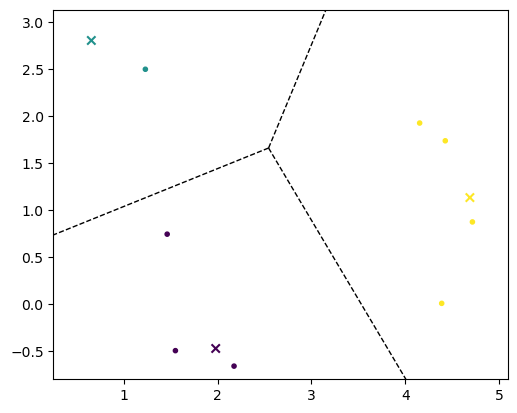

In [17]:
from scipy.spatial import Voronoi, voronoi_plot_2d

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.scatter(X[:,0], X[:,1], c=y_pred, marker='.')
ax.scatter(centers[:,0], centers[:,1], marker='x', c=range(num_clusters))

vor = Voronoi(centers)
voronoi_plot_2d(vor, ax, show_points=False, show_vertices=False)

plt.show()

## K-meansの特徴

（[Comparing different clustering algorithms on toy datasets](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)の例を参考にした）

K-meansはクラスタ中心からのユークリッド距離でクラスタを分けるため、データの形状によっては人間が期待するようなクラスタが得られないことがある。

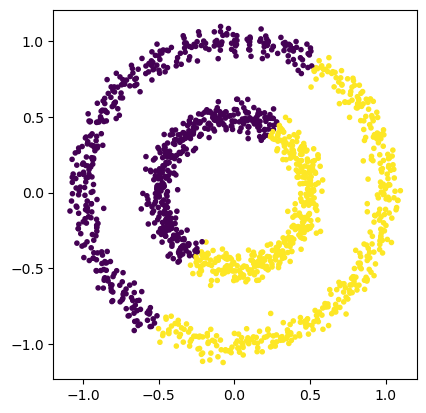

In [18]:
X, y = datasets.make_circles(n_samples=1500, factor=.5, noise=.05)
model = KMeans(n_clusters=2)
model.fit(X)

fig, ax = plt.subplots(dpi=100)
ax.scatter(X[:,0], X[:,1], c=model.labels_, marker='.')
ax.set_aspect('equal')
plt.show()

K-meansは鎖状にデータが存在しても、クラスタ中心から決定される境界（ボロノイ境界）でクラスタを分ける。データの形状によっては、あまりよい結果をもたらさないこともある。

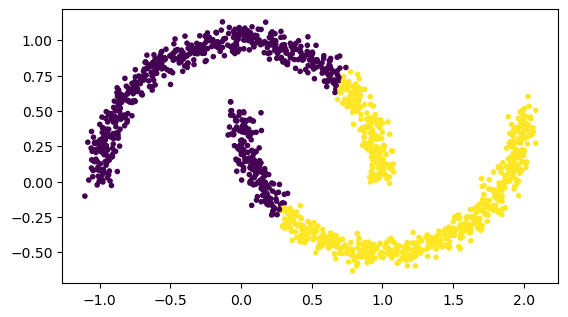

In [19]:
X, y = datasets.make_moons(1500, noise=.05)
model = KMeans(n_clusters=2)
model.fit(X)

fig, ax = plt.subplots(dpi=100)
ax.scatter(X[:,0], X[:,1], c=model.labels_, marker='.')
ax.set_aspect('equal')
plt.show()

K-meansは、各クラスタの事例数がほぼ同じになるようなクラスタ割り当てを行う傾向がある。

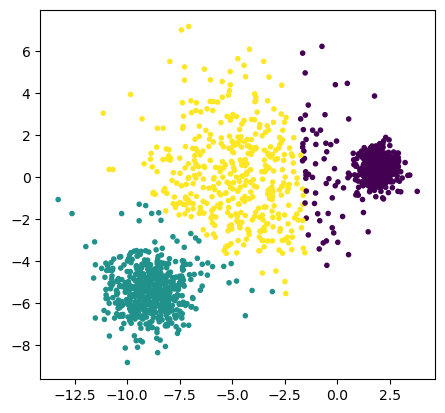

In [20]:
X, y = datasets.make_blobs(1500, cluster_std=[1.0, 2.5, 0.5], random_state=170)
model = KMeans(n_clusters=3)
model.fit(X)

fig, ax = plt.subplots(dpi=100)
ax.scatter(X[:,0], X[:,1], c=model.labels_, marker='.')
ax.set_aspect('equal')
plt.show()

## 応用: 色数の削減

K-meansクラスタリングの面白い応用例として、**色数の削減**（color reduction）を紹介しよう。

コンピュータ上で表示される画像の一つのピクセルは、赤（R）、緑（G）、青（B）の輝度値で表現される。$0$から$255$までの整数の集合を$B$と書くことにすると、ひとつのピクセルは$B^3$の色空間、すなわち$3$次元のベクトルで表現される。ここで、$|B^3| = 16,777,216$であるから、ひとつのピクセルは約1677万通りの色で表現される。しかし、人間の目は輝度値の微妙な差にあまり敏感ではない。そこで、画像中の色の中で、似ている色をまとめた$K$個のクラスタを作り、画像の各ピクセルの色をクラスタで表現することで、色の数を$K$個に減らすことを考える。K-meansクラスタリングを用いる場合、以下の手順となる。

1. 画像中の各ピクセルの輝度値を$3$次元ベクトル$\pmb{x}_i \in B^3$で表す。
2. 画像中の全ピクセルの輝度値を学習データ$\mathcal{D} = \{\pmb{x}_i\}_{i=1}^{N}$と考える（$N$は画像中のピクセルの総数、すなわち画像の幅×高さである）
3. 学習データ$\mathcal{D}$に対してK-meansクラスタリングを適用し、$K$個のクラスタ中心$\pmb{\mu}_1, \dots, \pmb{\mu}_K$を求める（この$\pmb{\mu}_k$が色の代表である）。
4. 画像中の全ピクセルをクラスタ番号で表す（これにより、画像中の色数を$K$色に削減したことになる）

この色数の削減は、減色処理や色の量子化（color quantization）などとも呼ばれる。なお、量子化（quantization）とは、信号を離散的な値で近似的に表現することを表す。色をベクトルと見なせば、ベクトルを離散的な値で近似的に表現していることから、ベクトル量子化（vector quantization）の一種である。

以降では、画像の色を$8$色（$K=8$）に減らすプログラムを説明する。まず、ターゲットとなる画像を読み込む。画像の読み込みには、[Pillow](https://pillow.readthedocs.io/en/stable/)というライブラリを用いている。

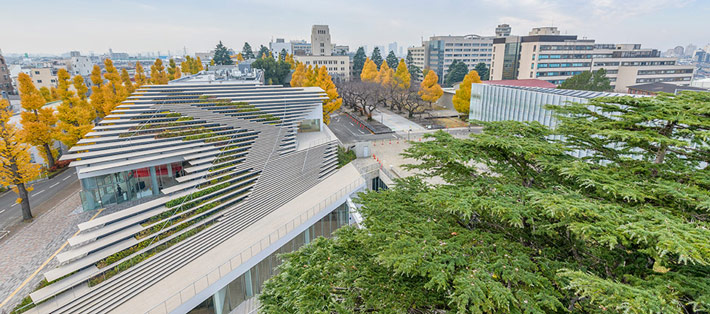

In [21]:
import io
import requests
from PIL import Image

img = Image.open(io.BytesIO(requests.get(
    "https://www.titech.ac.jp/news/img/news-26569-title.jpg").content))
img

読み込んだ画像をNumPyのオブジェクトに変換する。

In [22]:
m = np.array(img)

NumPyオブジェクトの次元数は3で、先頭から縦方向の位置、横方向の位置、RGBに対応する。

In [23]:
m.shape

(314, 710, 3)

In [24]:
m

array([[[201, 217, 230],
        [201, 217, 230],
        [201, 217, 230],
        ...,
        [191, 213, 236],
        [191, 213, 236],
        [190, 212, 235]],

       [[202, 216, 227],
        [202, 216, 227],
        [202, 216, 227],
        ...,
        [191, 213, 236],
        [191, 213, 236],
        [190, 212, 235]],

       [[202, 216, 227],
        [202, 216, 227],
        [202, 216, 227],
        ...,
        [192, 213, 234],
        [192, 213, 234],
        [192, 213, 234]],

       ...,

       [[183, 178, 184],
        [193, 184, 189],
        [148, 136, 138],
        ...,
        [ 76,  96,  35],
        [ 65,  87,  25],
        [105, 124,  69]],

       [[196, 196, 194],
        [194, 193, 191],
        [134, 128, 128],
        ...,
        [ 23,  27,  28],
        [ 63,  75,  29],
        [ 69,  87,  27]],

       [[196, 196, 194],
        [162, 161, 159],
        [138, 132, 132],
        ...,
        [ 27,  33,  23],
        [ 74,  84,  49],
        [ 61,  76,  35]]

例えば、画像の左上のピクセルにアクセスするには、次のようにすればよい。RGB値が3次元のベクトルとして表現されている。

In [25]:
m[0][0]

array([201, 217, 230], dtype=uint8)

さて、K-meansクラスタリングを適用できるようにするため、2次元で配置されていたピクセルを1列に並べる。

In [26]:
X = m.reshape(-1, 3)

In [27]:
X.shape

(222940, 3)

In [28]:
X

array([[201, 217, 230],
       [201, 217, 230],
       [201, 217, 230],
       ...,
       [ 27,  33,  23],
       [ 74,  84,  49],
       [ 61,  76,  35]], dtype=uint8)

$K=8$としてK-meansクラスタリングを実行する

In [29]:
model = KMeans(n_clusters = 8)
model.fit(X)

KMeans()

`model.labels_`には各ピクセルに割り当てられたクラスタ番号が格納されている。

In [30]:
model.labels_

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

元画像のピクセルの並びに合うように、全てのクラスタ番号を2次元に再配置した行列`label_matrix`を作成する。

In [31]:
label_matrix = model.labels_.reshape(m.shape[0], m.shape[1])
label_matrix

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [1, 1, 0, ..., 2, 2, 6],
       [1, 1, 0, ..., 3, 3, 2],
       [1, 0, 0, ..., 3, 2, 3]], dtype=int32)

この`label_matrix`を可視化する。この可視化では、クラスタの番号が色として表現される。同じ色の点は同じクラスタ番号が割り振られたことを表す。元画像においてRGB値が似ていた点、すなわち色が似ていた点がクラスタにまとめられたことが確認できる。ただし、クラスタの番号と色の対応関係（カラー・パレット）を元画像に合わせていないため、元画像の色合いとはかけ離れた可視化結果となる。

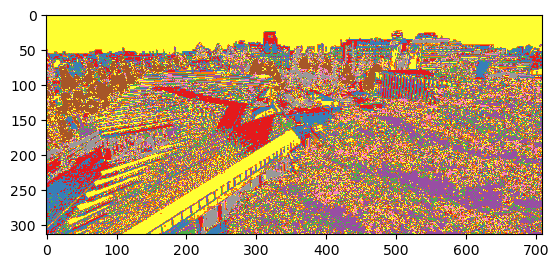

In [32]:
fig, ax = plt.subplots(dpi=100)
ax.imshow(label_matrix, cmap=plt.get_cmap('Set1'))
fig.show()

全クラスタの中心を表示する。これは、元画像の色の代表として選ばれた8色のRGB値であり、元画像の色を8色に減色したことを意味する。この代表の色（ベクトル）を、色数の削減ではパレット（palette）、ベクトル量子化ではコードブック（codebook）と呼ぶ。

In [33]:
model.cluster_centers_

array([[147.76310368, 153.19600517, 142.0648811 ],
       [182.79084307, 184.2598832 , 181.50610213],
       [ 84.01926638, 100.12249836,  49.70001195],
       [ 42.65898403,  57.07405302,  23.86357294],
       [213.2012908 , 215.95457511, 219.18776561],
       [184.06998031, 137.1601378 ,  32.83730315],
       [124.99006448, 144.59065656,  77.07924085],
       [101.22208832, 108.6432814 , 110.75148489]])

色のRGB値を整数で表示するため、これらのRGB値を整数に丸める。

In [34]:
palette = model.cluster_centers_.astype(int)
palette

array([[147, 153, 142],
       [182, 184, 181],
       [ 84, 100,  49],
       [ 42,  57,  23],
       [213, 215, 219],
       [184, 137,  32],
       [124, 144,  77],
       [101, 108, 110]])

減色後の画像がどのようになったのかを確認するため、各ピクセルのクラスタ番号からその色を取り出す。なお、NumPyにおいてインデックスに行列を用いた場合の動作は[Indexing with Arrays of Indices](https://numpy.org/doc/stable/user/quickstart.html#indexing-with-arrays-of-indices)で説明されている。

In [35]:
image_decoded = palette[label_matrix]
image_decoded

array([[[213, 215, 219],
        [213, 215, 219],
        [213, 215, 219],
        ...,
        [213, 215, 219],
        [213, 215, 219],
        [213, 215, 219]],

       [[213, 215, 219],
        [213, 215, 219],
        [213, 215, 219],
        ...,
        [213, 215, 219],
        [213, 215, 219],
        [213, 215, 219]],

       [[213, 215, 219],
        [213, 215, 219],
        [213, 215, 219],
        ...,
        [213, 215, 219],
        [213, 215, 219],
        [213, 215, 219]],

       ...,

       [[182, 184, 181],
        [182, 184, 181],
        [147, 153, 142],
        ...,
        [ 84, 100,  49],
        [ 84, 100,  49],
        [124, 144,  77]],

       [[182, 184, 181],
        [182, 184, 181],
        [147, 153, 142],
        ...,
        [ 42,  57,  23],
        [ 42,  57,  23],
        [ 84, 100,  49]],

       [[182, 184, 181],
        [147, 153, 142],
        [147, 153, 142],
        ...,
        [ 42,  57,  23],
        [ 84, 100,  49],
        [ 42,  57,  23]]

このNumPyオブジェクトを画像として表示すると、次のようになる。色の精密さは失われているが、元画像をよく表している。

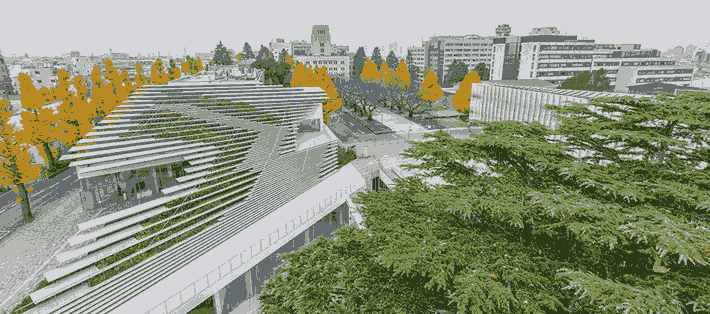

In [36]:
Image.fromarray(np.uint8(image_decoded))

さて、ベクトル量子化により元画像をどのくらい圧縮できたのかを考察してみたい。元画像のサイズは$710 \times 314$で、各ピクセルはRGBの輝度値、各輝度値8ビット（1バイト）で表現できるので、（JPEG等で圧縮していない状態の）元画像の情報量は、

\begin{align*}
710 \times 314 \times 3 \times 1 = 668,820 \text{ [bytes]} = 668.82 \text{ [kB]}
\end{align*}

これに対し、ベクトル量子化を施した後、元画像を復元するのに必要な情報はパレット（コードブック）とクラスタ番号である。$K=8$としたとき、パレットの情報量は、
\begin{align*}
3 \times 1 \times 8 = 24 \text{ [bytes]}
\end{align*}

各画素は8種類の値、すなわち$3$ビットで表現できるので、

\begin{align*}
710 \times 314 \times 3 = 668,820 \text{ [bits]} \approx 83,603 \text{ [bytes]}
\end{align*}

ゆえに、パレットとクラスタ番号を保存するのに必要なバイト数は、

\begin{align*}
83,603 \text{ [bytes]} + 24 \text{ [bytes]} = 83,627 \text{ [bytes]} = 83.627 \text{ [kB]}
\end{align*}

したがって、色数の削減により元画像データの情報量を約1/8に圧縮したことになる。

## 確認問題

[教育用標準データセット（SSDSE）](https://www.nstac.go.jp/SSDSE/)に収録されている都道府県庁所在市別・家計消費データ（SSDSE-C）に対してクラスタ分析を適用し、消費行動が類似している都道府県のクラスタを作りたい。

**(1) データセットの読み込み**

このデータセットを読み込み、各都道府県庁所在地を特徴ベクトルで表現せよ。

In [37]:
URL = "https://www.nstac.go.jp/sys/files//SSDSE-C-2022.csv"

In [38]:
import urllib
from pathlib import Path


csv = urllib.request.urlopen(URL).read().decode("shift-jis")
csv_path = Path("./data/ssdse-c-2022.csv")
with csv_path.open(mode="w", encoding="utf-8") as f:
    f.write(csv)

In [39]:
import pandas as pd


raw_df = pd.read_csv(csv_path)
raw_df.head(5)

,SSDSE-C-2022,Prefecture,City,LA03,LB00,LB01,LB011001,LB012001,LB012002,LB013001,...,LB121104,LB121105,LB121106,LB121107,LB121108,LB121109,LB121110,LB121201,LB121202,LB122001
0,地域コード,都道府県,市,世帯人員,食料（合計）,01 穀類,米,食パン,他のパン,生うどん・そば,...,すし（外食）,和食,中華食,洋食,焼肉,ハンバーガー,他の主食的外食,喫茶代,飲酒代,学校給食
1,R00000,全国,全国,2.95,960240,79678,22998,10163,21494,3513,...,13620,19716,4179,9794,6184,5067,44164,6522,11358,9713
2,R01100,北海道,札幌市,2.84,942332,82566,29665,9367,18496,3214,...,16906,22845,3772,15761,7132,4187,20326,5462,14817,13273
3,R02201,青森県,青森市,2.87,892205,73320,21932,8285,17063,3164,...,12594,13802,2748,6796,5794,3991,14162,2833,6874,9698
4,R03201,岩手県,盛岡市,3.12,937554,79379,23297,8402,20278,3435,...,11490,9847,1826,5333,4951,3884,35759,4046,11100,10647


不要な行/列を削除する。

In [40]:
code_name = raw_df.iloc[0,:]  # コードの名称記載行を取得
df = raw_df.drop(0, axis=0) # 不要な行の削除
location_name = df.iloc[:,:3]  # 県庁所在地名を取得
df = df.drop(["Prefecture", "City"], axis=1) # 不要な列の削除
df = df.set_index("SSDSE-C-2022")  # 県庁所在地のコードをindexにする
df = df.astype("float32")  # 数値型に変換

データを表す特徴ベクトルを決める。  
今回はLB12「外食」の中分類に注目し、外食に所属する品目のデータを特徴量とする。  
データ項目の意味は「[SSDSE-家計消費の解説](https://www.nstac.go.jp/sys/files//kaisetsu-C-2022.pdf)」に記載されている。  
地域項目を除くデータ項目は226であり、食料品の中分類、小分類、品目ごとにコードが採番され列項目として定義されている。  
値は2019年から2021年の1世帯当たりの年間支出金額の平均値である。

留意する点として、都道府県庁所在地は計47しかないため、県庁所在地+全国(行)に比べデータ項目(列)が非常に多いデータといえる。  
今回は「消費行動」の類似性を調べるため、消費行動が顕著に表れる項目に絞ることを考えたい。  
外食は地域ごとの飲食店数や所得の影響が反映され消費行動の差として現れると推察されることから、「外食」の項目を選択した。


ターゲットとする外食の品目の身に絞り込む。外食の品目コードはLB12である。  

In [41]:
TARGET_CATEGORY = "LB12"

feature_df = df[[c for c in df.columns if c.startswith(TARGET_CATEGORY) and len(c) > len(TARGET_CATEGORY)]]

地域ごとの世帯数でばらつきが出ないよう、世帯人数で割り一人当たりの支出金額とする。

In [42]:
feature_df = feature_df.divide(df["LA03"], axis=0)

都道府県庁所在市の特徴ベクトルの表現を次の通りとした。

In [43]:
feature_df.head(5)

,LB121101,LB121102,LB121103,LB121104,LB121105,LB121106,LB121107,LB121108,LB121109,LB121110,LB121201,LB121202,LB122001
SSDSE-C-2022,,,,,,,,,,,,,
R00000,1855.593140,2080.338867,709.830505,4616.949219,6683.389648,1416.610107,3320.000000,2096.271240,1717.627075,14970.847656,2210.847412,3850.169434,3292.542236
R01100,1965.140869,2357.394531,573.943665,5952.816895,8044.014160,1328.169067,5549.647949,2511.267578,1474.295776,7157.042480,1923.239502,5217.253906,4673.591797
R02201,1604.529663,3312.892090,282.926849,4388.153320,4809.059570,957.491333,2367.944336,2018.815430,1390.592407,4934.495117,987.108032,2395.122070,3379.094238
R03201,1747.756470,2740.705322,565.384644,3682.692383,3156.089844,585.256409,1709.294922,1586.859009,1244.871826,11461.218750,1296.794922,3557.692383,3412.500244
R04100,2191.666748,3111.000000,817.333313,4128.000000,5340.666504,963.333313,2513.333252,2024.333374,1528.333374,11679.000000,1699.000000,2665.333252,3059.000000


**(2) WCSSのプロット**

K-meansクラスタリングを異なるクラスタ数$K$で実行し、横軸にクラスタ数、縦軸にK-meansの目的関数の値、すなわちクラスタ内平方和（WCSS: within-cluster sum-of-squares）をプロットしたグラフを描画せよ。

K-meansクラスタを実行する関数

In [44]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


def kmeans(X, n_clusters=3, normalize=True):
    _X = X
    if normalize:
        _X = StandardScaler().fit_transform(X)

    model = KMeans(n_clusters).fit(_X)
    return model

クラスタ数ごとのWCSSの値をプロットする。[scikit-learnのドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)から、`inertia_` にSum of squared distances、つまりWCSSが取得できることを確認できる

In [45]:
import pandas as pd


num_clusters = range(2, 10)
models = []
for n_clusters in num_clusters:
    model = kmeans(feature_df, n_clusters=n_clusters, normalize=True)
    models.append(model)

<AxesSubplot:>

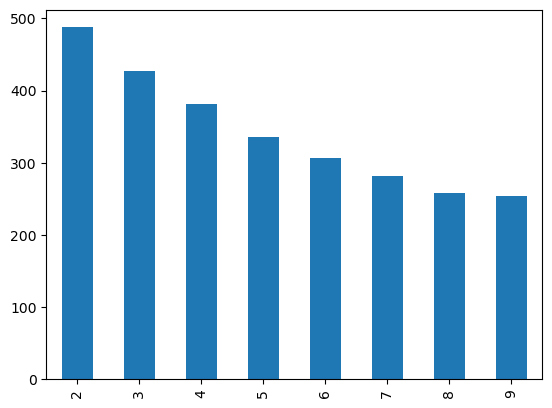

In [46]:
pd.Series(data=[m.inertia_ for m in models], name="wcss", index=list(num_clusters)).plot.bar()

**(3) K-meansクラスタリング**

(2)の結果に基づき、クラスタ数$K$を適当に選び、K-meansクラスタリングを実行せよ。$1$から$K$までの各クラスタに対して、それぞれ所属する都道府県庁所在地を明らかにせよ。

クラスタ数が7ぐらいからWCSSの低下スピードが下がっているように見えるため、クラスタ数7で分類を行ってみる。

In [47]:
target_n_clusters = 7

In [48]:
model = None
wcss_bar = 0
for trial in range(100):
    _model = kmeans(feature_df, n_clusters=target_n_clusters, normalize=True)
    if model is None or _model.inertia_ < wcss_bar:
        model = _model
        wcss_bar = _model.inertia_

クラスタへの割り当て結果を参照する。クラスタへの割り当て結果は、[scikit-learnのドキュメント](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)より`labels_`で確認できる。

In [49]:
cluster_df = pd.merge(
    feature_df.assign(Cluster=model.labels_),
    location_name.set_index("SSDSE-C-2022"),
    left_index=True, right_index=True)
cluster_df.sort_values("Cluster")[["Cluster", "Prefecture", "City"]]

,Cluster,Prefecture,City
SSDSE-C-2022,,,
R35203,0,山口県,山口市
R45201,0,宮崎県,宮崎市
R44201,0,大分県,大分市
R43100,0,熊本県,熊本市
R40130,0,福岡県,福岡市
R31201,0,鳥取県,鳥取市
R32201,0,島根県,松江市
R33100,0,岡山県,岡山市
R46201,0,鹿児島県,鹿児島市


各クラスタを決定づける特徴を確認したい。クラスタの番号をラベルとして予測モデルを構築し、特徴量の重要度からクラスタの分類に寄与している特徴を発見する。

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RandomForestClassifier())
])

pipeline.fit(cluster_df.drop(columns=["Prefecture", "City", "Cluster"]), cluster_df["Cluster"])

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestClassifier())])

In [51]:
# To get feature name of pipeline, please refer https://github.com/scikit-learn/scikit-learn/issues/22093
importance_df = pd.DataFrame({
    "importance": pipeline["model"].feature_importances_,
    "id": pipeline[:-1].get_feature_names_out(),
    "name": code_name[pipeline[:-1].get_feature_names_out()]
})

In [52]:
importance_df.sort_values("importance", ascending=False)

,importance,id,name
LB121102,0.110365,LB121102,中華そば
LB121106,0.101288,LB121106,中華食
LB121201,0.099590,LB121201,喫茶代
LB121101,0.098629,LB121101,日本そば・うどん
LB121109,0.089037,LB121109,ハンバーガー
LB121110,0.088006,LB121110,他の主食的外食
LB121104,0.075521,LB121104,すし（外食）
LB122001,0.074267,LB122001,学校給食
LB121105,0.066752,LB121105,和食
LB121107,0.064894,LB121107,洋食


日本そば・うどん、中華そばといった麺類がクラスタを決定づけている傾向が見える。(※クラスタリングの結果は変わるので、重要な特徴も実行のたびに変わる可能性がある)

---

[機械学習帳](https://chokkan.github.io/mlnote/) © Copyright 2020-2022 by [岡崎 直観 (Naoaki Okazaki)](https://www.chokkan.org/). この作品は<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">クリエイティブ・コモンズ 表示 - 非営利 - 改変禁止 4.0 国際 ライセンス</a>の下に提供されています。 <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/80x15.png" /></a>　ただし、作品中のコードセル部分は<a rel="license" href="https://opensource.org/licenses/MIT">MITライセンス</a>の下に提供されています。